In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib

data=pd.read_csv("C:/Users/PC/OneDrive/Documents/DOMAIN KNOWLEDGE PROJECT/archive/train data.csv")
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
df=data.copy()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
df.drop(df.columns[0],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
print(df['Gender'].unique())

['Male' 'Female' nan]


In [36]:
print(df['Married'].unique())

['No' 'Yes' nan]


In [37]:
print(df['Dependents'].unique())

['0' '1' '2' '3+' nan]


In [38]:
print(df['Education'].unique())

['Graduate' 'Not Graduate']


In [39]:
print(df['Self_Employed'].unique())

['No' 'Yes' nan]


In [40]:
print(df['LoanAmount'].unique())

[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243.
  40. 250. 311. 400. 161. 196. 324. 157. 145. 181.  26. 211.   9. 205.
  36. 

In [41]:
print(df['Credit_History'].unique())

[ 1.  0. nan]


In [42]:
print(df['Property_Area'].unique())

['Urban' 'Rural' 'Semiurban']


In [43]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
print("Initial shape:", df.shape)
print(df['Loan_Status'].value_counts())

Initial shape: (614, 12)
Loan_Status
Y    422
N    192
Name: count, dtype: int64


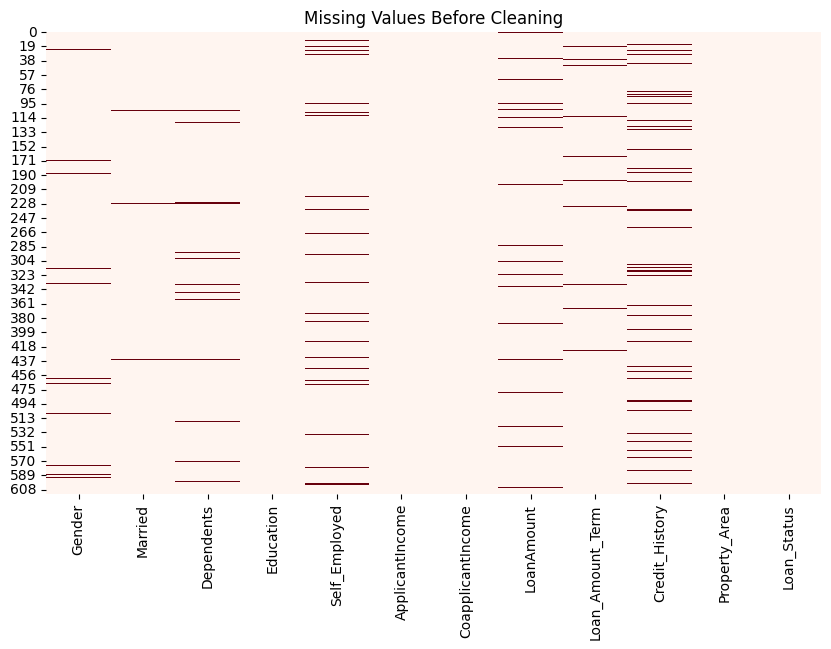

In [45]:
# Visualize missing values(before cleaning)
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Before Cleaning")
plt.show()

In [46]:
#handling missing value
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].mode()[0])
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
#handling missing value
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].mode()[0])
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
df.fillna(df.median(numeric_only=True), inplace=True)
df  

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


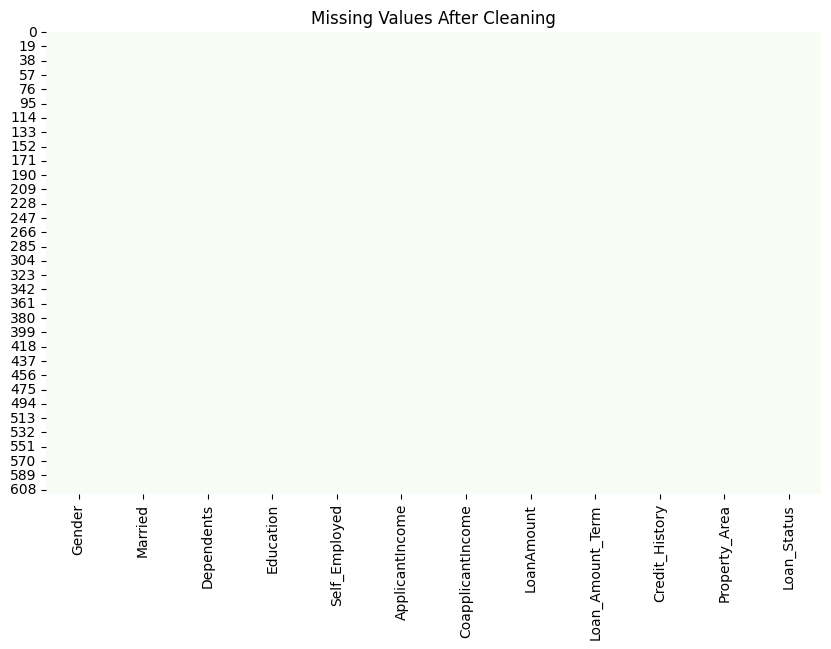

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Values After Cleaning")
plt.show()

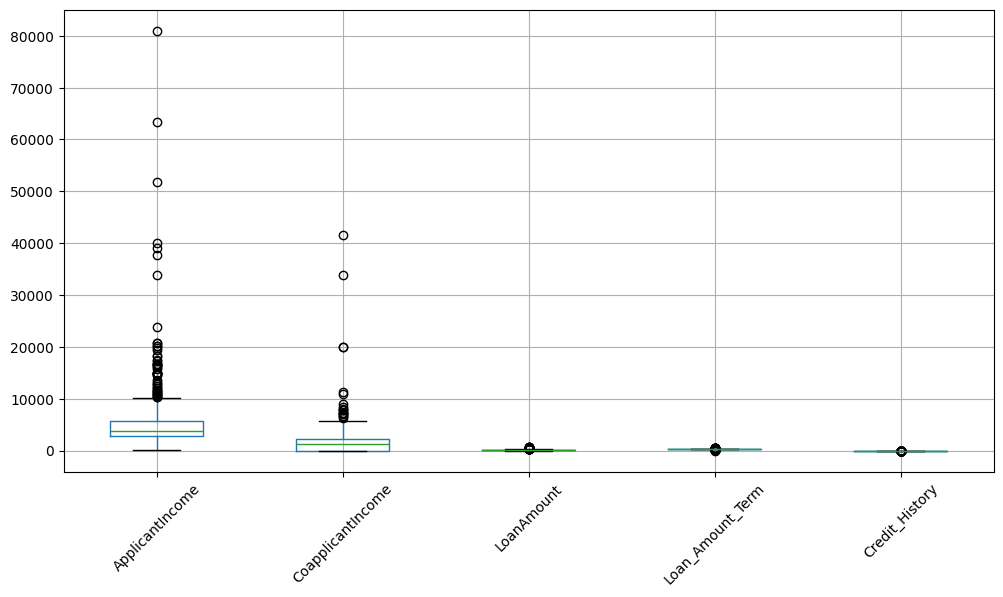

In [50]:
num_cols = df.select_dtypes(include='number').columns.tolist()
df.boxplot(column=num_cols, figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

In [51]:
# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Calculate skewness
skew_values = df[num_cols].skew()

# Interpretation based on skewness
highly_right_skewed = skew_values[skew_values > 1]
highly_left_skewed = skew_values[skew_values < -1]
moderately_skewed = skew_values[(abs(skew_values) > 0.5) & (abs(skew_values) <= 1)]

print("Skewness Values:\n", skew_values)

print("\nHighly Right-Skewed Columns (Skewness > 1):")
print(highly_right_skewed)

print("\nHighly Left-Skewed Columns (Skewness < -1):")
print(highly_left_skewed)

print("\nModerately Skewed Columns (0.5 < |Skewness| <= 1):")
print(moderately_skewed)


Skewness Values:
 ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Highly Right-Skewed Columns (Skewness > 1):
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
dtype: float64

Highly Left-Skewed Columns (Skewness < -1):
Loan_Amount_Term   -2.402112
Credit_History     -2.021971
dtype: float64

Moderately Skewed Columns (0.5 < |Skewness| <= 1):
Series([], dtype: float64)


In [52]:
#handle Highly Right-Skewe
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

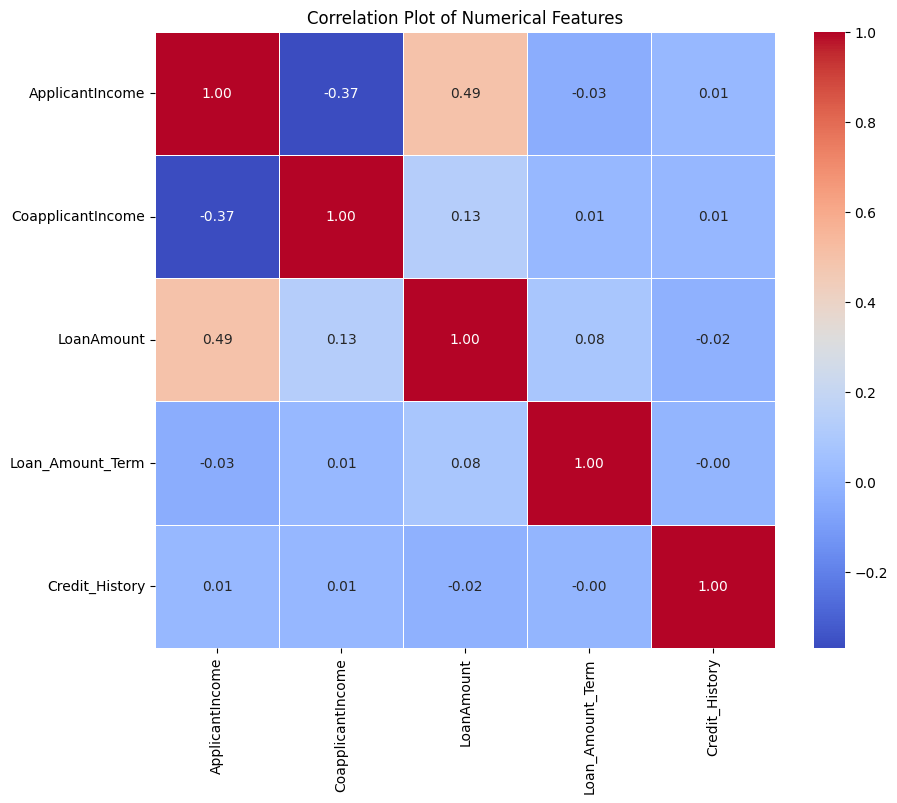

In [53]:
# Only include numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Numerical Features")
plt.show()


In [54]:
#ENCODE TARGET VARIABLE
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,4.859812,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,8.320448,0.000000,3.713572,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8.996280,5.484797,5.537334,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,8.933796,0.000000,5.236442,360.0,1.0,Urban,1


In [55]:
# IMBALANCE CHECK IN TARGET COLUMN

#counts of 1 and 0
print("Target Class Distribution:")
print(df['Loan_Status'].value_counts())

#instead of counts it shows percentage
print("\nPercentage Distribution:")
percentages = df['Loan_Status'].value_counts(normalize=True) * 100
print(percentages)

Target Class Distribution:
Loan_Status
1    422
0    192
Name: count, dtype: int64

Percentage Distribution:
Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64


In [56]:
# Report Imbalance
threshold = 60  #default 60,can adjust
if any(percentages > threshold):
    print("\nTarget column is imbalanced.")
    use_smote = True
else:
    print("\nTarget column is balanced.")
    use_smote = False


Target column is imbalanced.


In [57]:
#Label Encoding for Binary Categorical Features

le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,Urban,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,Rural,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,Urban,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,Urban,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,Rural,1
610,1,1,3+,0,0,8.320448,0.000000,3.713572,180.0,1.0,Rural,1
611,1,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,Urban,1
612,1,1,2,0,0,8.933796,0.000000,5.236442,360.0,1.0,Urban,1


In [58]:
#One-Hot Encoding for Multi-class Categorical Features
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,8.006701,0.000000,4.204693,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,7.857094,7.765993,4.795791,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,1,False,False,False,False,False
610,1,1,0,0,8.320448,0.000000,3.713572,180.0,1.0,1,False,False,True,False,False
611,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,1,True,False,False,False,True
612,1,1,0,0,8.933796,0.000000,5.236442,360.0,1.0,1,False,True,False,False,True


In [59]:
#FEATURE AND TARGET SPLIT
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

#STRATIFIED TRAIN_TEST_SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# HANDLES THE IMBALANCE

from imblearn.over_sampling import SMOTE
if use_smote:
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

In [61]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)  # training data
X_test = scaler.transform(X_test)      

In [63]:
model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=5000, random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [65]:
# EVALUATE MODEL
print("\nModel Evaluation:")

acc = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {acc:.2f}%")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 71.54%

Confusion Matrix:
 [[20 23]
 [12 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.53        43
           1       0.75      0.85      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.66      0.66       123
weighted avg       0.70      0.72      0.70       123



In [66]:
predicted_approved = sum(y_pred == 1)
predicted_not_approved = sum(y_pred == 0)

print(f"\nNumber of applications predicted as Approved: {predicted_approved}")
print(f"Number of applications predicted as Not Approved: {predicted_not_approved}")



Number of applications predicted as Approved: 91
Number of applications predicted as Not Approved: 32


In [76]:
# Save the trained Logistic Regression model
joblib.dump(model, 'loan_approval_model.pkl')

# Save the StandardScaler used during preprocessing
joblib.dump(scaler, 'scaler.pkl')

# Save the list of columns (after one-hot encoding)
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

print("\nModel, scaler, and column structure saved successfully!")



Model, scaler, and column structure saved successfully!
